# Sesión 3: Analítica avanzada

Esta práctica se realizará sobre los datos obtenidos de la página https://www.kaggle.com
<br> Antes de iniciar acceda al archivo ReadMe.txt disponible en la carpeta y revise la descripción de los datos a trabajar en la sesión.

### Preparación del ambiente de trabajo
#### Cargue de librerías

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de los datos
<br> Ingrese a la carpeta compartida en Onedrive TALLER 3 y cargue el archivo
<br> Configuración del directorio

In [2]:
# Acualice la ruta donde se ecuentran los datos
# %cd C:\Users\X1 Carbon\OneDrive\Documentos\1_NEICON\1_Proyectos\2_Carpeta Tito\Capacitación UniAndes_Ecopetrol\Datsets\Taller_2\Originales

In [3]:
# Cague de los archivos en formato texto o excel
df_machines=pd.read_csv('PdM_machines.csv', sep=',')
df_machines.head(4)

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7


In [4]:
# Cague de los archivos en formato texto o excel
df_telemetry=pd.read_csv('PdM_telemetry.csv', sep=',')
df_telemetry.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object

In [5]:
df_telemetry.head(10)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
5,2015-01-01 11:00:00,1,172.504839,430.323362,95.927042,35.655017
6,2015-01-01 12:00:00,1,156.556031,499.071623,111.755684,42.753920
7,2015-01-01 13:00:00,1,172.522781,409.624717,101.001083,35.482009
8,2015-01-01 14:00:00,1,175.324524,398.648781,110.624361,45.482287
9,2015-01-01 15:00:00,1,169.218423,460.850670,104.848230,39.901735


In [6]:
# Transformación variable fecha
df_telemetry['datetime'] = pd.to_datetime(df_telemetry['datetime']).dt.date
df_telemetry.head(4)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01,1,162.462833,346.149335,109.248561,41.122144


In [7]:
# Cague de los archivos en formato texto o excel
df_failures=pd.read_csv('PdM_failures.csv', sep=',')
df_failures.dtypes

datetime     object
machineID     int64
failure      object
dtype: object

In [8]:
# Transformación variable fecha
df_failures['datetime'] = pd.to_datetime(df_failures['datetime']).dt.date
df_failures.head(4)

,datetime,machineID,failure
0,2015-01-05,1,comp4
1,2015-03-06,1,comp1
2,2015-04-20,1,comp2
3,2015-06-19,1,comp4


In [9]:
# Cague de los archivos en formato texto o excel
df_maint=pd.read_csv('PdM_maint.csv', sep=',')
df_maint.dtypes

datetime     object
machineID     int64
comp         object
dtype: object

In [10]:
# Transformación variable fecha
df_maint['datetime'] = pd.to_datetime(df_maint['datetime']).dt.date
df_maint.rename(columns={'comp': 'Mantein'}, inplace=True)
df_maint.head(4)

,datetime,machineID,Mantein
0,2014-06-01,1,comp2
1,2014-07-16,1,comp4
2,2014-07-31,1,comp3
3,2014-12-13,1,comp1


In [11]:
# Comparamos el tamaño de los dos dataframes
print(df_telemetry.shape, df_failures.shape)

(876100, 6) (761, 3)


In [13]:
# Integración de conjunto de datos Telemetria y fallos
df_merge1 = pd.merge(
    df_telemetry,
    df_failures,
    on=['datetime', 'machineID'],   # columnas clave, se deben llamar igual en los dos dataframes
    how='left'   
)

df_merge1.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,failure
0,2015-01-01,1,176.217853,418.504078,113.077935,45.087686,NaN
1,2015-01-01,1,162.879223,402.747490,95.460525,43.413973,NaN
2,2015-01-01,1,170.989902,527.349825,75.237905,34.178847,NaN
3,2015-01-01,1,162.462833,346.149335,109.248561,41.122144,NaN
4,2015-01-01,1,157.610021,435.376873,111.886648,25.990511,NaN


In [14]:
df_telemetry.shape

(876100, 6)

In [15]:
df_merge1.shape

(877132, 7)

In [16]:
# Integración de conjunto de datos Telemetria + fallos y Máquina
df_merge2 = pd.merge(
    df_merge1,
    df_machines,
    on=['machineID'],   # columnas clave, se deben llamar igual en los dos dataframes
    how='left'   
)

df_merge2.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,failure,model,age
0,2015-01-01,1,176.217853,418.504078,113.077935,45.087686,NaN,model3,18
1,2015-01-01,1,162.879223,402.747490,95.460525,43.413973,NaN,model3,18
2,2015-01-01,1,170.989902,527.349825,75.237905,34.178847,NaN,model3,18
3,2015-01-01,1,162.462833,346.149335,109.248561,41.122144,NaN,model3,18
4,2015-01-01,1,157.610021,435.376873,111.886648,25.990511,NaN,model3,18


In [17]:
df_merge2.shape

(877132, 9)

In [18]:
# Integración de conjunto de datos Telemetria + fallos + Máquina y Mantenimiento
df_merge3 = pd.merge(
    df_merge2,
    df_maint,
    on=['datetime', 'machineID'],   # columnas clave, se deben llamar igual en los dos dataframes
    how='left'   
)

df_merge3.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,failure,model,age,Mantein
0,2015-01-01,1,176.217853,418.504078,113.077935,45.087686,NaN,model3,18,NaN
1,2015-01-01,1,162.879223,402.747490,95.460525,43.413973,NaN,model3,18,NaN
2,2015-01-01,1,170.989902,527.349825,75.237905,34.178847,NaN,model3,18,NaN
3,2015-01-01,1,162.462833,346.149335,109.248561,41.122144,NaN,model3,18,NaN
4,2015-01-01,1,157.610021,435.376873,111.886648,25.990511,NaN,model3,18,NaN


In [19]:
df_merge3.shape

(895480, 10)

In [20]:
# Renombramos el archivo final
df_analitica=df_merge3
df_analitica.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,failure,model,age,Mantein
0,2015-01-01,1,176.217853,418.504078,113.077935,45.087686,NaN,model3,18,NaN
1,2015-01-01,1,162.879223,402.747490,95.460525,43.413973,NaN,model3,18,NaN
2,2015-01-01,1,170.989902,527.349825,75.237905,34.178847,NaN,model3,18,NaN
3,2015-01-01,1,162.462833,346.149335,109.248561,41.122144,NaN,model3,18,NaN
4,2015-01-01,1,157.610021,435.376873,111.886648,25.990511,NaN,model3,18,NaN


In [21]:
# Esta sintaxis guarda la tabla de resultados costruida en la ruta definida
df_analitica.to_csv('PdM_analitica.csv', index=False)

## Entramos al análisis de los datos

In [22]:
# Relación entre variables categóricas y continuas
tabla=df_analitica.pivot_table(values='rotate',columns='model',aggfunc=['mean', 'std']).round(2)
tabla_final = tabla.stack(level=1, future_stack=True).reset_index()
print(tabla_final)

  level_0   model    mean    std
0  rotate  model1  446.22  53.05
1  rotate  model2  446.73  52.57
2  rotate  model3  446.47  52.73
3  rotate  model4  446.63  52.65


In [25]:
df_analitica[['vibration', 'rotate']].corr().head()

,vibration,rotate
vibration,1.000000,-0.003831
rotate,-0.003831,1.000000


In [23]:
#Análisis de correlación de Pearson
correlacion_pearson = df_analitica[['vibration', 'rotate']].dropna().corr(method='pearson').iloc[0, 1]
print(correlacion_pearson)

-0.0038308900924815437


In [26]:
#Análisis de correlación de Spearman
correlacion_spearman = df_analitica[['vibration', 'rotate']].dropna().corr(method='spearman').iloc[0, 1]
print(correlacion_spearman)

-0.003300164190148436


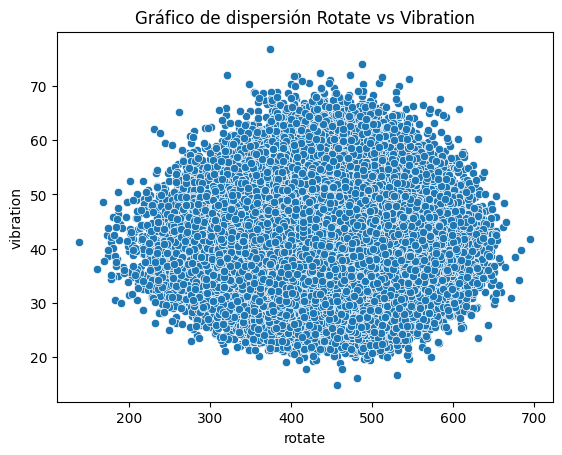

In [27]:
# Gráficos de dispersión - Scatterplots

%matplotlib inline

sns.scatterplot(data=df_analitica, x='rotate', y='vibration')
plt.title('Gráfico de dispersión Rotate vs Vibration')
plt.show()

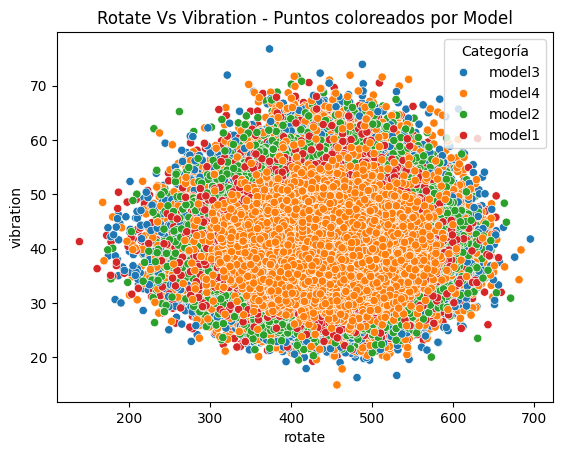

In [28]:
# Gráficos de dispersión - Scatterplots

%matplotlib inline

sns.scatterplot(data=df_analitica, x='rotate', y='vibration' , hue='model')
plt.title('Rotate Vs Vibration - Puntos coloreados por Model')
plt.legend(loc='upper right', title='Categoría') 
plt.show()

In [30]:
df_analitica.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
failure       object
model         object
age            int64
Mantein       object
dtype: object

In [29]:
# Pruebas Chi2
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Crear tabla de contingencia con etiquetas
tabla = pd.crosstab(df_analitica['Mantein'], df_analitica['model'])

# Aplicar prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla)

# Convertir expected a DataFrame con las mismas etiquetas que tabla original
expected_df = pd.DataFrame(expected, index=tabla.index, columns=tabla.columns)

# Mostrar resultados
print("📊 Frecuencias Observadas (model vs mantein):")
print(tabla)

print("\n📈 Frecuencias Esperadas (model vs mantein):")
print(expected_df)

print("\n📐 Resultados de la prueba chi-cuadrado:")
print(f"  - Estadístico χ²: {chi2:.4f}")
print(f"  - Valor p: {p:.4f} - Menor a 0,05 se rechaza Ho: No existe asociación entre las variables")
print(f"  - Grados de libertad: {dof}")



📊 Frecuencias Observadas (model vs mantein):
model    model1  model2  model3  model4
Mantein                                
comp1      2712    2952    5834    5820
comp2      2959    3192    7279    5484
comp3      2880    2760    6175    5449
comp4      3025    3168    5832    5586

📈 Frecuencias Esperadas (model vs mantein):
model         model1       model2       model3       model4
Mantein                                                    
comp1    2819.316917  2940.116951  6117.937193  5440.628939
comp2    3079.140788  3211.073565  6681.756789  5942.028858
comp3    2810.525884  2930.949246  6098.860590  5423.664281
comp4    2867.016412  2989.860239  6221.445427  5532.677922

📐 Resultados de la prueba chi-cuadrado:
  - Estadístico χ²: 194.2235
  - Valor p: 0.0000 - Menor a 0,05 se rechaza Ho: No existe asociación entre las variables
  - Grados de libertad: 9


In [31]:
# Análisis de Varianza - ANOVA
from scipy.stats import f_oneway

# Agrupar los valores de v1 por cada categoría de model
grupos = [grupo['rotate'].values for nombre, grupo in df_analitica.groupby('model')]

# Aplicar ANOVA de una vía
f_stat, p_valor = f_oneway(*grupos)

# Mostrar resultados
print("📊 Resultados del ANOVA:")
print(f"  - Estadístico F: {f_stat:.4f}")
print(f"  - Valor p: {p_valor:.4f}")

# Interpretación básica
if p_valor < 0.05:
    print("❗ Rechazamos la hipótesis nula - Ho: No hay diferencias significativas entre los grupos de model.")
else:
    print("✅ No se rechaza la hipótesis nula Ho")


📊 Resultados del ANOVA:
  - Estadístico F: 2.8898
  - Valor p: 0.0340
❗ Rechazamos la hipótesis nula - Ho: No hay diferencias significativas entre los grupos de model.


In [33]:
# Regresión lineal
import statsmodels.api as sm

# Elimina valores faltantes en las variables
data_limpia = df_analitica.dropna(subset=['rotate', 'pressure', 'vibration', 'volt'])

# Definir variables independientes (X) y dependiente (Y)
X = data_limpia[['rotate', 'pressure', 'vibration']] #variables independientes o explictivas
y = data_limpia['volt']  #variable dependiente o repuesta 

# Agregar constante (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                   volt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.255
Date:                Thu, 24 Jul 2025   Prob (F-statistic):            0.00517
Time:                        10:42:09   Log-Likelihood:            -3.7265e+06
No. Observations:              895480   AIC:                         7.453e+06
Df Residuals:                  895476   BIC:                         7.453e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.4583      0.239    712.319      0.0

In [35]:
from sklearn.cluster import KMeans

df = df_telemetry.drop(columns=['datetime'])

# Clusterización método de k-medias
# Número de clusters deseado (por ejemplo, k=3)
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo
kmeans.fit(df)

# Asignación de etiquetas
df['cluster'] = kmeans.labels_

df.dtypes


machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
cluster        int32
dtype: object

In [37]:
df.head()

,machineID,volt,rotate,pressure,vibration,cluster
0,1,176.217853,418.504078,113.077935,45.087686,2
1,1,162.879223,402.747490,95.460525,43.413973,2
2,1,170.989902,527.349825,75.237905,34.178847,0
3,1,162.462833,346.149335,109.248561,41.122144,4
4,1,157.610021,435.376873,111.886648,25.990511,2


In [36]:
# Contamos cuantos registros quedaron en cada Grupo
frecuencia_Grupos = df['cluster'].value_counts().to_frame()
frecuencia_Grupos

,count
cluster,
2,233143
3,185447
1,184130
0,142665
4,130715


In [38]:
# Estandarización de variables
from sklearn.preprocessing import StandardScaler

# Lista de columnas continuas a estandarizar
variables_continuas = ['rotate', 'pressure', 'vibration']

# Inicializa y ajusta el escalador
scaler = StandardScaler()
data_limpia[variables_continuas] = scaler.fit_transform(data_limpia[variables_continuas])

In [39]:
data_limpia.head(5)

,datetime,machineID,volt,rotate,pressure,vibration,failure,model,age,Mantein
0,2015-01-01,1,176.217853,-0.531367,1.103035,0.874285,NaN,model3,18,NaN
1,2015-01-01,1,162.879223,-0.830185,-0.488977,0.562805,NaN,model3,18,NaN
2,2015-01-01,1,170.989902,1.532850,-2.316411,-1.155860,NaN,model3,18,NaN
3,2015-01-01,1,162.462833,-1.903547,0.756991,0.136294,NaN,model3,18,NaN
4,2015-01-01,1,157.610021,-0.211381,0.995384,-2.679717,NaN,model3,18,NaN
